# Bank Churners Prediction (Modeling)

## 1. Importing libraries and dataframes

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
# plt.style.use('ggplot')

In [2]:
# Loading the dataframes
X_train = pd.read_csv('..\Dataset\X_train.csv', index_col=0).reset_index(drop=True)
X_test = pd.read_csv('..\Dataset\X_test.csv', index_col=0).reset_index(drop=True)
y_train = pd.read_csv('..\Dataset\y_train.csv', index_col=0).reset_index(drop=True).values.ravel()
y_test = pd.read_csv('..\Dataset\y_test.csv', index_col=0).reset_index(drop=True).values.ravel()

In [3]:
X_train.head()

,Age,Dependent_Count,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Income_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.710852,-1.042934,0.009833,-1.183174,-0.336100,-0.418276,-0.681429,1.014035,-0.773185,-1.055874,...,0,0,0,0,0,1,0,0,0,0
1,-1.669559,0.501317,-1.743667,0.745873,0.654364,-0.418276,0.080113,-1.407099,0.208114,-0.616482,...,0,0,0,0,1,0,0,0,0,0
2,0.710852,0.501317,0.009833,0.745873,0.654364,0.485129,-0.646585,-0.088370,-0.638037,-1.034175,...,0,0,0,0,0,1,0,0,0,0
3,0.209713,1.273442,-1.493167,0.102857,-0.336100,0.485129,-0.772121,-1.407099,-0.643454,-0.036050,...,0,1,0,0,0,0,1,0,0,0
4,0.209713,1.273442,0.135082,-1.183174,-0.336100,-1.321682,1.124630,-1.407099,1.251814,0.142962,...,0,0,0,1,0,0,0,0,0,0


## 2. Customer churn prediction using K Nearest Neighbors Classifier

Tuning hyperparameters for KNN classifier

In [4]:
# define models and parameters
param_grid = {'n_neighbors': list(range(1,11)), 'leaf_size': list(range(1,50)), 'p':[1,2]}
knn = KNeighborsClassifier()

# define randomized search cv and train the training dataset
knn_cv = RandomizedSearchCV(estimator = knn, param_distributions = param_grid, cv=5, scoring='f1_weighted')
best_model = knn_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

Best Parameters: {'p': 2, 'n_neighbors': 9, 'leaf_size': 38}
Best Score: 0.9066999954212898


Creating an optimum KNN Classifier by using best parameters from RandomizedSearchCV()

Model: KNeighborsClassifier(leaf_size=38, n_neighbors=9)
Precision Score: 0.847
Recall Score: 0.587
Training Accuracy: 0.928
Test Accuracy: 0.914
F1 Score: 0.907


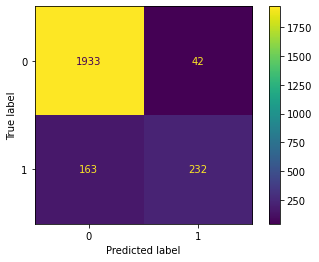

In [5]:
# Create the optimum KNN Classifier
optimum_knn = KNeighborsClassifier(p = best_params['p'], n_neighbors = best_params['n_neighbors'], leaf_size = best_params['leaf_size'])
# optimum_knn = KNeighborsClassifier(p = 2, n_neighbors = 5, leaf_size = 45)

#Train the model using the training sets
optimum_knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = optimum_knn.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_knn)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_knn.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_knn.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_knn, X_test, y_test, values_format = 'd' ))
plt.savefig(f"..\Figures\Confusion_Matrix_For_KNN.png", dpi=300)

Plotting ROC curve and finding the area under roc curve for optimum KNN classifier

Area Under ROC: 0.942


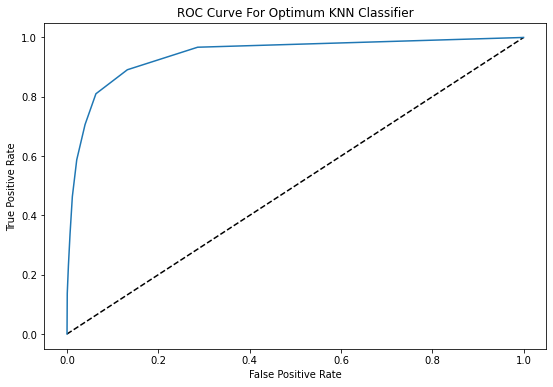

In [6]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = optimum_knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under roc curve
print('Area Under ROC: %.3f'% (roc_auc_score(y_test, y_pred_prob)))
# Plot ROC curve
fig, ax = plt.subplots(figsize=(9,6))
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve For Optimum KNN Classifier')
fig.savefig(f"..\Figures\ROC_for_Optimum_KNN_Classifier.png", dpi=300)
plt.show()

## 3. Customer churn prediction using Logistic Regression Classifier

Tuning hyperparameters for Logistic Regression classifier

In [7]:
# define models and parameters
c_space = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'C': c_space, 'penalty' : ['l2']}
logreg = LogisticRegression(solver='newton-cg', max_iter=100)

# define randomized search cv and train the training dataset
logreg_cv = GridSearchCV(logreg, param_grid = param_grid, cv = 5)
best_model = logreg_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.8999712965354918


Model: LogisticRegression(C=0.1)
Precision Score: 0.768
Recall Score: 0.580
Training Accuracy: 0.900
Test Accuracy: 0.901
F1 Score: 0.895


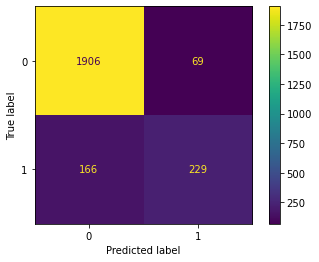

In [8]:
# Create the optimum Logistic Regression Classifier
optimum_logreg = LogisticRegression(C = best_params['C'], penalty = best_params['penalty'])
# optimum_logreg = LogisticRegression(C = 0.1, penalty = 'l2')

#Train the model using the training sets
optimum_logreg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = optimum_logreg.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_logreg)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_logreg.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_logreg.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_logreg, X_test, y_test, values_format = 'd' ))
plt.savefig(f"..\Figures\Confusion_Matrix_For_Logistic_Regression.png", dpi=300)

Plotting ROC curve and finding the area under roc curve for optimum Logistic Regression Classifier

Area Under ROC: 0.934


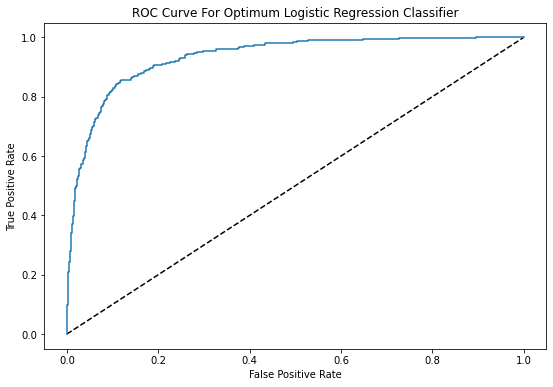

In [9]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = optimum_logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under roc curve
print('Area Under ROC: %.3f'% (roc_auc_score(y_test, y_pred_prob)))
# Plot ROC curve
fig, ax = plt.subplots(figsize=(9,6))
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve For Optimum Logistic Regression Classifier')
fig.savefig(f"..\Figures\ROC_for_Optimum_Logistic_Regression_Classifier.png", dpi=300)
plt.show()

## 4. Customer churn prediction using Decision Tree Classifier

Tuning hyperparameters for Decision Tree classifier

In [10]:
# define models and parameters
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth' : list(range(1,10))}
clf = DecisionTreeClassifier()

# define randomized search cv and train the training dataset
clf_cv = RandomizedSearchCV(clf, param_distributions = param_grid, cv = 5)
best_model = clf_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

Best Parameters: {'max_depth': 9, 'criterion': 'gini'}
Best Score: 0.9399262221984677


Model: DecisionTreeClassifier(max_depth=9)
Precision Score: 0.857
Recall Score: 0.772
Training Accuracy: 0.982
Test Accuracy: 0.941
F1 Score: 0.939


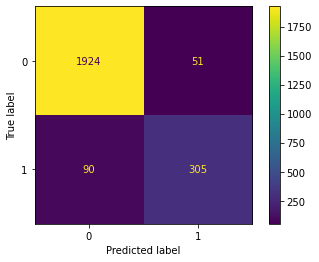

In [11]:
#Create the optimum Decision Tree Classifier
optimum_clf = DecisionTreeClassifier(criterion = best_params['criterion'], max_depth = best_params['max_depth'])

#Train the model using the training sets
optimum_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = optimum_clf.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_clf)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_clf.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_clf.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_clf, X_test, y_test, values_format = 'd' ))
plt.savefig(f"..\Figures\Confusion_Matrix_For_Decision_Tree.png", dpi=300)

Plotting ROC curve and finding the area under roc curve for optimum Decision Tree Classifier

Area Under ROC: 0.907


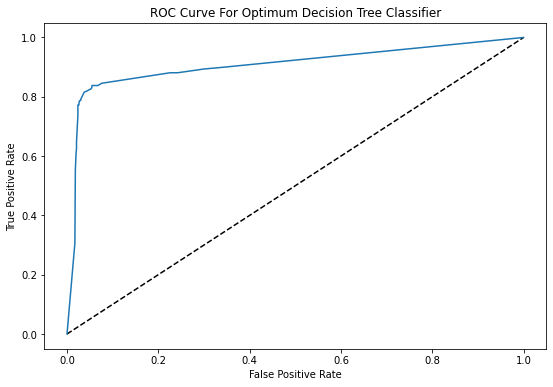

In [12]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = optimum_clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under roc curve
print('Area Under ROC: %.3f'% (roc_auc_score(y_test, y_pred_prob)))
# Plot ROC curve
fig, ax = plt.subplots(figsize=(9,6))
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve For Optimum Decision Tree Classifier')
fig.savefig(f"..\Figures\ROC_for_Optimum_Decision_Tree_Classifier.png", dpi=300)
plt.show()

## 5. Customer churn prediction using Support Vector Machines (SVM) Classifier

In [13]:
# define models and parameters
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svc = SVC()
svc_cv = GridSearchCV(svc, param_grid, refit=True, verbose=2)

best_model = svc_cv.fit(X_train, y_train)

print(best_model.best_params_)

best_params = best_model.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.7s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.6s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.6s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] .

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.6s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.9s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.9s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.6s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   1.5s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   1.6s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.4s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   0.5s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.4min finished


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


Model: SVC(C=1, gamma=0.1, probability=True)
Precision Score: 0.885
Recall Score: 0.719
Training Accuracy: 0.966
Test Accuracy: 0.938
F1 Score: 0.935


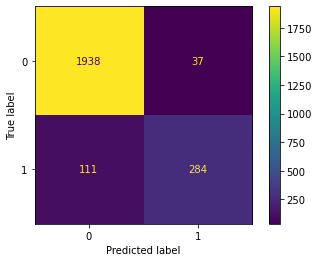

In [14]:
# Create a svm Classifier
clf = SVC(C = best_params['C'], gamma = best_params['gamma'], kernel = best_params['kernel'], probability=True) 
# clf = SVC(C = 10, gamma = 0.1, kernel = 'rbf')

#Train the model using the training sets
optimum_clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = optimum_clf.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_clf)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_clf.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_clf.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_clf, X_test, y_test, values_format = 'd' ))
plt.savefig(f"..\Figures\Confusion_Matrix_For_SVM.png", dpi=300)

Plotting ROC curve and finding the area under roc curve for optimum SVM Classifier

Area Under ROC: 0.970


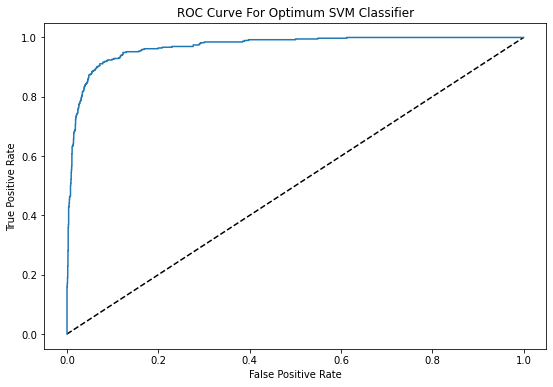

In [15]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = optimum_clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under roc curve
print('Area Under ROC: %.3f'% (roc_auc_score(y_test, y_pred_prob)))
# Plot ROC curve
fig, ax = plt.subplots(figsize=(9,6))
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve For Optimum SVM Classifier')
fig.savefig(f"..\Figures\ROC_for_Optimum_SVM_Classifier.png", dpi=300)
plt.show()

## 6. Customer churn prediction using Random Forest Classifier

In [16]:
# define models and parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf = RandomForestClassifier()

# define randomized search cv and train the training dataset
clf_cv = RandomizedSearchCV(clf, param_distributions = param_grid, cv = 5, n_jobs = -1, random_state=123)
best_model = clf_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

Best Parameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
Best Score: 0.9575127359251571


Model: RandomForestClassifier(bootstrap=False, n_estimators=800, random_state=42)
Precision Score: 0.906
Recall Score: 0.830
Training Accuracy: 1.000
Test Accuracy: 0.957
F1 Score: 0.957


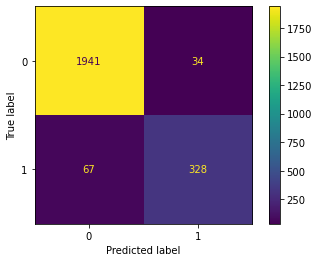

In [17]:
# Best Parameters: {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators = best_params['n_estimators'], min_samples_split = best_params['min_samples_split']\
                             , min_samples_leaf = best_params['min_samples_leaf'], max_features = best_params['max_features']\
                             , max_depth = best_params['max_depth'], bootstrap = best_params['bootstrap'], random_state=42)

#Train the model using the training sets
optimum_clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = optimum_clf.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_clf)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_clf.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_clf.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_clf, X_test, y_test, values_format = 'd' ))
plt.savefig(f"..\Figures\Confusion_Matrix_For_RandomForest.png", dpi=300)

Plotting ROC curve and finding the area under roc curve for optimum Random Forest Classifier

Area Under ROC: 0.987


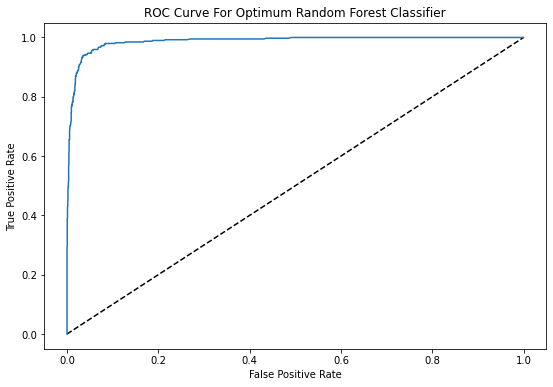

In [18]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = optimum_clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under roc curve
print('Area Under ROC: %.3f'% (roc_auc_score(y_test, y_pred_prob)))
# Plot ROC curve
fig, ax = plt.subplots(figsize=(9,6))
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve For Optimum Random Forest Classifier')
fig.savefig(f"..\Figures\ROC_for_Optimum_Random_Forest_Classifier.png", dpi=300)
plt.show()

## 7. Customer churn prediction using Gradient Boosting Classifier

In [26]:
# Define models and parameters
param_grid = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

gbc = GradientBoostingClassifier()

# define randomized search cv and train the training dataset
gbc_cv = RandomizedSearchCV(gbc, param_distributions = param_grid, cv = 5)
best_model = gbc_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

Best Parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.1}
Best Score: 0.9691885134673687


Model: GradientBoostingClassifier(n_estimators=500)
Precision Score: 0.934
Recall Score: 0.901
Training Accuracy: 0.997
Test Accuracy: 0.973
F1 Score: 0.973


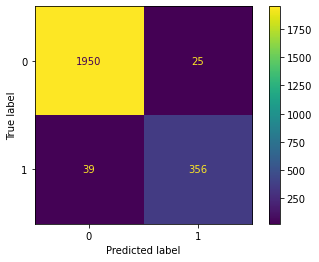

In [41]:
# **Grid Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
# Create the optimum Gradient Boosting Classifier
"""
gbc = GradientBoostingClassifier(n_estimators=best_params['n_estimators'], learning_rate = best_params['learning_rate']
                                 , max_depth = best_params['max_depth'])
"""
# manually set best parameters by using several experiments
gbc = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 3)

#Train the model using the training sets
optimum_gbc = gbc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = optimum_gbc.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_gbc)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_gbc.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_gbc.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_gbc, X_test, y_test, values_format = 'd' ))
plt.savefig(f"..\Figures\Confusion_Matrix_For_GB.png", dpi=300)

Plotting ROC curve and finding the area under roc curve for optimum Gradient Boosting Classifier

Area Under ROC: 0.994


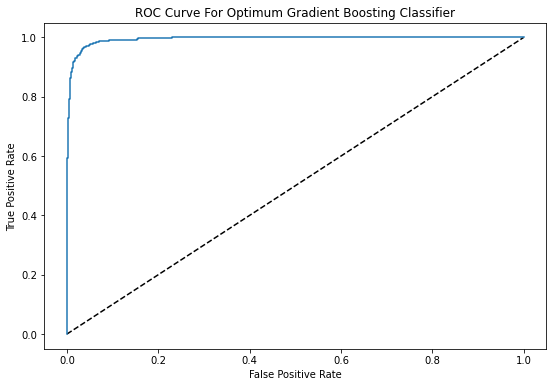

In [42]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = optimum_gbc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under roc curve
print('Area Under ROC: %.3f'% (roc_auc_score(y_test, y_pred_prob)))
# Plot ROC curve
fig, ax = plt.subplots(figsize=(9,6))
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve For Optimum Gradient Boosting Classifier')
fig.savefig(f"..\Figures\ROC_for_Optimum_Gradient_Boosting_Classifier.png", dpi=300)
plt.show()

## 8. Customer attrition prediction using XGB Classifier

In [29]:
# DM_train = xgb.DMatrix(data=X_train, label=y_train)
# DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Define models and parameters
param_grid = {'max_depth':range(3,10,1), 'min_child_weight':range(1,7,2), 
              'gamma':[i/10.0 for i in range(0,6)], 'n_estimators' : list(range(100,2000,100)), 
              'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric="logloss")

# define randomized search cv and train the training dataset
xgb_cv = RandomizedSearchCV(xgb_clf, param_distributions = param_grid, cv = 5, verbose=1, n_jobs=-1)
best_model = xgb_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
best_params = best_model.best_params_
print('Best Parameters:', best_params)
print('Best Score:', best_model.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.9s finished


Best Parameters: {'reg_alpha': 1, 'n_estimators': 900, 'min_child_weight': 3, 'max_depth': 3, 'gamma': 0.2}
Best Score: 0.9691889093772239


Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=1, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
Precision Score: 0.935
Recall Score: 0.909
Training Accuracy: 0.999
Test Accuracy: 0.974
F1 Score: 0.974


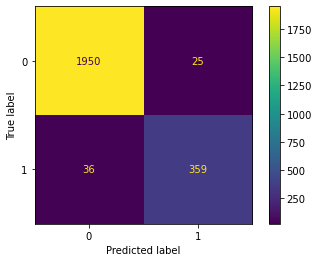

In [38]:
# 1.Best Parameters: {'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 0.0}
# 2.Best Parameters: {'reg_alpha': 1e-05, 'n_estimators': 1200, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 0.2}
# Instantiate the optimum XGBClassifier: xgb_cl

# manually set best parameters by using several experiments
xgb_cl = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, n_jobs=-1,
                           reg_alpha = 1, n_estimators = 500,
                           min_child_weight = 1, max_depth = 3,
                           gamma = 0.0, eval_metric='logloss')

"""
xgb_cl = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, n_jobs=-1,
                          reg_alpha = best_params['reg_alpha'], n_estimators = best_params['n_estimators'],
                          min_child_weight = best_params['min_child_weight'], max_depth = best_params['max_depth'],
                          gamma = best_params['gamma'], eval_metric='logloss')
"""                 

# Fit the classifier to the training set
optimum_xgb = xgb_cl.fit(X_train, y_train)


# Predict the labels of the test set: preds
y_pred = optimum_xgb.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_xgb)
print('Precision Score: %.3f' % (precision_score(y_test, y_pred)))
print('Recall Score: %.3f' % (recall_score(y_test, y_pred)))
print('Training Accuracy: %.3f' % (optimum_xgb.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_xgb.score(X_test, y_test)))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))
print(plot_confusion_matrix(optimum_xgb, X_test, y_test, values_format = 'd' ))
plt.savefig(f"..\Figures\Confusion_Matrix_For_XGB.png", dpi=300)

In [39]:
# plot_confusion_matrix(optimum_xgb, X_test, y_test, values_format = 'd')
# plt.savefig('..\Figures\plot_confusion_matrix.png')

Plotting ROC curve and finding the area under roc curve for optimum XGBoost Classifier

Area Under ROC: 0.994


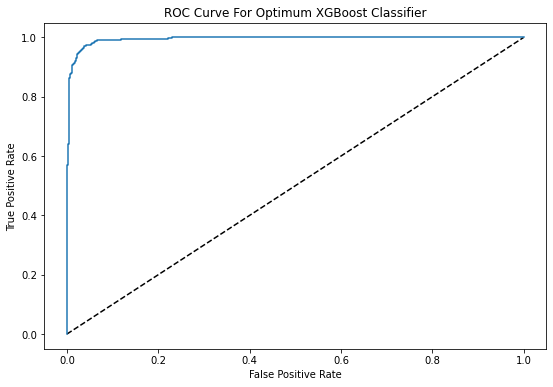

In [40]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = optimum_xgb.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under roc curve
print('Area Under ROC: %.3f'% (roc_auc_score(y_test, y_pred_prob)))
# Plot ROC curve
fig, ax = plt.subplots(figsize=(9,6))
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve For Optimum XGBoost Classifier')
fig.savefig(f"..\Figures\ROC_for_Optimum_XGBoost_Classifier.png", dpi=300)
plt.show()

## Final Outcomes

I have used different classifier algorithms to accurately detect customer churn. We know, hyperparameters are essential for finding the best results from a model. For that reason, I have used hyperparameter tuning for each algorithms to find the best hyperparameters. Among all of those algorithms the ensemble methods worked well and have showed significantly high scoring values for precision, recall, and f1 score. I have used three differend kind of ensemble methods including Random Forest Classifier, Gradient Boosting Classifier, and XGBoost Classifier for training and testing. Among those three ensemble methods XGBoost showed significantly high Precision, Recall, F1 Score, Training Accuracy, and Test Accuracy values. The resultant summary of XGBoost are: Precision Score: 0.938, Recall Score: 0.904, Training Accuracy: 1.000, Test Accuracy: 0.974, F1 Score: 0.974